# Statistical models in R
This notebook is covering:
1. VECM

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

In [2]:
# rpy2 is a Python package that allows you to run R code from Python
%pip install rpy2

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the rpy2 extension to use R in Jupyter
%load_ext rpy2.ipython

The magic function `%%R` is used for running R code in Jupyter

In [4]:
%%R
source("tvecm.r")
hub1_name <- "the"
hub2_name <- "nbp"
validation_size <- 250
test_size <- 250
window_size <- 5
nthresh <- 2

Loading required package: tsDyn
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: Metrics

Attaching package: ‘Metrics’

The following object is masked from ‘package:tsDyn’:

    mse

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
%%R
if (require("foreach") == FALSE) {
  install.packages("foreach")
  library(foreach)
}
if (require("doParallel") == FALSE) {
  install.packages("doParallel")
  library(doParallel)
}

Loading required package: foreach
Loading required package: doParallel
Loading required package: iterators
Loading required package: parallel


In [6]:
%%R

validation_size <- 100
test_size <- 100
# Set up the parallel backend to use multiple cores
num_cores <- 11 # Use one less than the total number of cores
cl <- makeCluster(num_cores)
registerDoParallel(cl)
clusterEvalQ(cl, library(tsDyn))

clusterExport(cl, varlist=c("tvecm_system", "validation_size", "test_size"))

pairs <- list(c("ttf", "the"), 
        c("ttf", "nbp"), 
        c("the", "nbp")
)
nthreshs <- c(1,2)
window_sizes <- c(5, 10)

# Use foreach to parallelize the loop
results <- foreach(i = 1:length(pairs), .combine = c, .multicombine = TRUE) %:%
           foreach(j = 1:length(nthreshs), .combine = c) %:%
           foreach(k = 1:length(window_sizes), .combine = c) %dopar% {

               pair <- pairs[[i]]
               hub1_name <- pair[1]
               hub2_name <- pair[2]
               nthresh <- nthreshs[j]
               window_size <- window_sizes[k]

               print(paste("Starting", hub1_name, hub2_name, nthresh, window_size))
               run <- tvecm_system(hub1_name, hub2_name, validation_size=validation_size, test_size=test_size, window_size=window_size, nthresh=nthresh, verbose=FALSE, save=TRUE)
               print(paste("Finished", hub1_name, hub2_name, nthresh, window_size))
               paste("Task", i,j,k, "done")
           }
print(results)
# Stop the parallel cluster
stopCluster(cl)


 [1] "Task 1 1 1 done" "Task 1 1 2 done" "Task 1 2 1 done" "Task 1 2 2 done"
 [5] "Task 2 1 1 done" "Task 2 1 2 done" "Task 2 2 1 done" "Task 2 2 2 done"
 [9] "Task 3 1 1 done" "Task 3 1 2 done" "Task 3 2 1 done" "Task 3 2 2 done"


In [7]:
%%R
num_cores <- detectCores() - 1  # Use one less than the total number of cores
print(paste("Detected cores:", num_cores))

cl <- makeCluster(num_cores)
registerDoParallel(cl)
print("Parallel backend registered")

stopCluster(cl)

[1] "Detected cores: 11"
[1] "Parallel backend registered"


In [8]:
%%R

num_cores <- detectCores() - 1
cl <- makeCluster(num_cores)
registerDoParallel(cl)

results <- foreach(i = 1:length(pairs), .combine = c, .multicombine = TRUE) %:%
           foreach(j = 1:length(nthreshs), .combine = c) %:%
           foreach(k = 1:length(window_sizes), .combine = c) %dopar% {
            Sys.sleep(1)  # Simulate some computation
            paste("Task", i,j,k, "done")
}

print(results)

stopCluster(cl)

 [1] "Task 1 1 1 done" "Task 1 1 2 done" "Task 1 2 1 done" "Task 1 2 2 done"
 [5] "Task 2 1 1 done" "Task 2 1 2 done" "Task 2 2 1 done" "Task 2 2 2 done"
 [9] "Task 3 1 1 done" "Task 3 1 2 done" "Task 3 2 1 done" "Task 3 2 2 done"


In [ ]:
%%R
pairs <- list(c("ttf", "the"), c("ttf", "nbp"), c("the", "nbp"))
nthreshs <- c(1,2)
window_sizes <- c(1, 2, 5, 10)
for (i in 1:length(pairs)) {
    for (j in 1:length(nthreshs)) {
        for(k in 1:length(window_sizes)) {
            pair <- pairs[[i]]
            hub1_name <- pair[1]
            hub2_name <- pair[2]
            nthresh <- nthreshs[j]
            window_size <- window_sizes[k]
            tvecm_system(hub1_name, hub2_name, validation_size=validation_size, test_size=test_size, window_size=window_size, nthresh=nthresh, verbose=FALSE, save=TRUE)
            print(paste("Finished", hub1_name, hub2_name, nthresh, window_size))
        }
    }
}

176 (0.9%) points of the grid lead to regimes with percentage of observations < trim and were not computed
1329 (6.6%) points of the grid lead to regimes with percentage of observations < trim and were not computed
1305 (6.5%) points of the grid lead to regimes with percentage of observations < trim and were not computed
1289 (6.4%) points of the grid lead to regimes with percentage of observations < trim and were not computed
240 (1.2%) points of the grid lead to regimes with percentage of observations < trim and were not computed
1289 (6.4%) points of the grid lead to regimes with percentage of observations < trim and were not computed


110 (0.5%) points of the grid lead to regimes with percentage of observations < trim and were not computed
#############
###Model TVECM
#############
Full sample size: 1290 	End sample size: 1284
Number of variables: 2 	Number of estimated parameters 48
AIC 7187.181 	BIC 7439.91 	SSR 78255.37 


Cointegrating vector: (1, - 1.21676 )
$Bdown
              ECT                Const               hub1 t -1       
Equation hub1 0.7177(4.6e-12)*** 17.6936(1.5e-11)*** -0.1086(0.6612) 
Equation hub2 0.8221(2.8e-13)*** 20.2151(1.1e-12)*** -0.1933(0.4714) 
              hub2 t -1       hub1 t -2        hub2 t -2      
Equation hub1 0.4402(0.0623). -0.2292(0.3094)  0.1931(0.3711) 
Equation hub2 0.5478(0.0322)* -0.0531(0.8280)  0.0236(0.9195) 
              hub1 t -3          hub2 t -3         hub1 t -4      
Equation hub1 -0.7456(0.0013)**  0.7026(0.0015)**  0.3772(0.0995).
Equation hub2 -0.8726(0.0005)*** 0.8330(0.0005)*** 0.4663(0.0602).
              hub2 t -4        hub1 t -5          hub2 t -

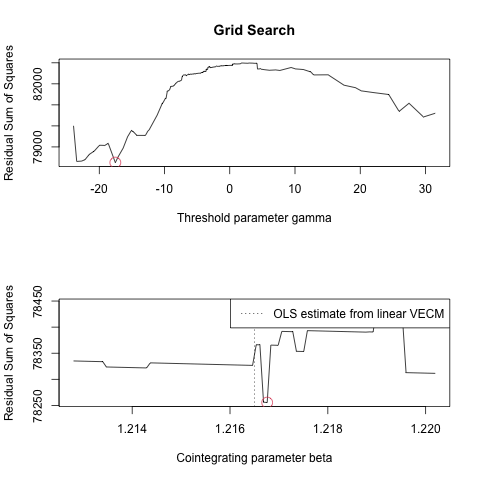

In [55]:
%%R
training_model <- tvecm_training_model(hub1_name, hub2_name, test_size, window_size, lag=5)
summary(training_model)

In [56]:
%%R
hub1_predictions <- vecm_output$predictions$hub1
hub1_actuals <- vecm_output$actuals$hub1
hub2_predictions <- vecm_output$predictions$hub2
hub2_actuals <- vecm_output$actuals$hub2


In [57]:
%%R
hub1_forecast_comparison <- data.frame(
  Actual = hub1_actuals,
  Forecasted = hub1_predictions
)

In [58]:
%R -o hub1_forecast_comparison
%R -o hub1_name

hub1_forecast_comparison = hub1_forecast_comparison

actual_trace = go.Scatter(
    x=hub1_forecast_comparison.index,
    y=hub1_forecast_comparison['Actual'],
    mode='lines',
    name='Actual Prices'
)

forecasted_trace = go.Scatter(
    x=hub1_forecast_comparison.index,
    y=hub1_forecast_comparison['Forecasted'],
    mode='lines',
    name='Forecasted Prices'
)

# Create the plot
layout = go.Layout(
    title= hub1_name.item() + ': VECM Actual vs Forecasted Prices',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Price'),
)

fig = go.Figure(data=[actual_trace, forecasted_trace], layout=layout)
fig.show()


In [59]:
%%R
hub2_forecast_comparison <- data.frame(
  Actual = hub2_actuals,
  Forecasted = hub2_predictions
)

In [60]:
%R -o hub2_forecast_comparison
%R -o hub2_name

hub2_forecast_comparison = hub2_forecast_comparison

actual_trace = go.Scatter(
    x=hub2_forecast_comparison.index,
    y=hub2_forecast_comparison['Actual'],
    mode='lines',
    name='Actual Prices'
)

forecasted_trace = go.Scatter(
    x=hub2_forecast_comparison.index,
    y=hub2_forecast_comparison['Forecasted'],
    mode='lines',
    name='Forecasted Prices'
)

# Create the plot
layout = go.Layout(
    title= hub2_name.item() + ': VECM Actual vs Forecasted Prices',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Price'),
)

fig = go.Figure(data=[actual_trace, forecasted_trace], layout=layout)
fig.show()
